In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

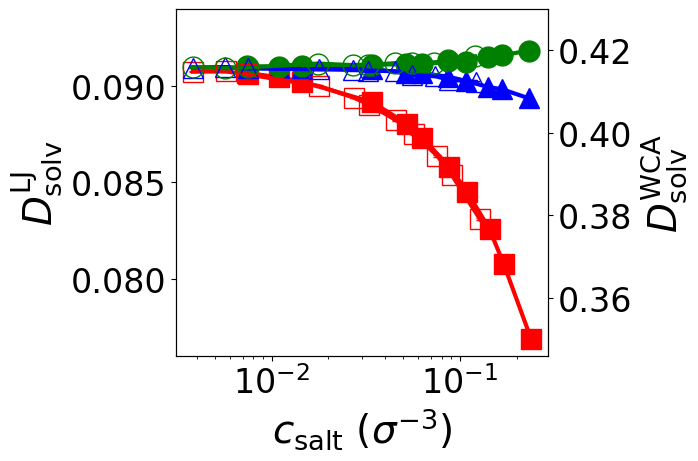

In [2]:
# ---------- Load Data ---------- #
concentrate_file = "concentrate_volume.csv"
concentrate_data = pd.read_csv(concentrate_file)
for col in concentrate_data.columns:
    globals()[col] = concentrate_data[col].dropna().to_numpy()


# ---------- Plot (same style as saved template) ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax1 = plt.subplots(figsize=(4.8, 4.5))
ax2 = ax1.twinx()

# ---------- LJ (filled markers) ----------
for eps in ['0.2', '1', '5']:
    diffusion_data_file = pd.read_csv(f"Diffusion_fit_solvent_MD_{eps}_LJ.csv")
    dsolv = np.array(diffusion_data_file["Dsolv"])
    dsolv_err = np.array(diffusion_data_file["Dsolv_err"])
    if eps=="0.2":
        eps_temp = "02"
    else:
        eps_temp = eps
    x = f"mean_c_salt_{eps_temp}_lj"
    x = globals()[x]    
    key = eps.replace('.', '')
    ax1.plot(x, dsolv, color = color_map[eps], linestyle="-", linewidth=3, alpha=1)
    ax1.errorbar(
        x, dsolv, yerr=dsolv_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc=color_map[eps], mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} LJ"
    )

# ---------- WCA (open markers) ----------
for eps in ['0.2', '1', '5']:
    diffusion_data_file = pd.read_csv(f"Diffusion_fit_solvent_MD_{eps}_WCA.csv")
    dsolv = np.array(diffusion_data_file["Dsolv"])
    dsolv_err = np.array(diffusion_data_file["Dsolv_err"])
    if eps=="0.2":
        eps_temp = "02"
    else:
        eps_temp = eps
    x = f"mean_c_salt_{eps_temp}_wca"
    x = globals()[x]    
    key = eps.replace('.', '')
    ax2.plot(x, dsolv, color = color_map[eps], linestyle="-", linewidth=3, alpha=1)
    ax2.errorbar(
        x, dsolv, yerr=dsolv_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc='none', mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} WCA"
    )

# ---------- Axes ----------
ax1.set_xlabel(r'$c_{\mathrm{salt}}$ $(\sigma^{-3})$', fontsize=28)
ax1.set_ylabel(r'$D_{\mathrm{solv}}^{\mathrm{LJ}}$', fontsize=28)
ax2.set_ylabel(r'$D_{\mathrm{solv}}^{\mathrm{WCA}}$', fontsize=28)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax1.set_xscale("log")
ax1.set_ylim(0.076, 0.094)
ax2.set_ylim(0.346, 0.43)
plt.show()